## __Q2 Movie Duration Analysis Project__
__Angel Colin__ <br>
__12/10/23__ <br>
__Intensive Data Science II__ <br>
Source For Data: https://www.kaggle.com/datasets/shivamb/netflix-shows <br>
In this project, I am using a data set of Netflix's movie listing to graph the average duration of movies in different countries. For the first graph, I graphed the average duration of movies in 2015 for movies made in Pakistan, India, Indonesia, Belgium, and the Netherlands. For my second graph, I graphed the change in average duration of movies over time in Indonesia and in the Netherlands. This subplot allowed me to see the difference in growth/decline of movies in countries with average movie durations that greatly differ. <br>
__Table Of Contents__
1. [Basic Data Summary](#[1]-Basic-Data-Summary)
2. [Converting Strings to Integer](#[2]-Converting-Strings-to-Integers)
3. [Data Table W/ Means](#[3]-Edits-For-Clarity-+-Data-Table-w/-Means)
4. [First Graph (Bar)](#[4]-First-Graph-(Bar))
5. [Mean Duration By Year For India & the Netherlands](#[5]-Mean-Duration-By-Country-and-Year)
6. [Subplot of Average Duration Over Time For India & the Netherlands](#[6]-Second-Graph-(Line))
7. [Mean & Correlation](#[7]-Mean-and-Correlation)
8. [Conclusion](#[8]-Conclusion)

### [1] Basic Data Summary
The following code showcases the first ten movies listed in the data set. As you can see, there is a wealth of data going from title to director to descripition and much more. Much of the data is qualitative, but for the sake of the project I will focus on the more interesting data that is also quantitative: duration.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean

from scipy.stats import binomtest
from scipy.stats import pearsonr
df = pd.read_csv('netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


### __[2]__ Converting Strings to Integers
As you can see the data under duration includes duration in terms of minutes for movies and seasons for TV Shows. This data is presented in a string which does not work for graphing purposes. The first thing I do in this code is remove all text in the data under duration. Then, I convert the numbers from strings into integers. Finally, for the the purpose of my first graph, I filter for movies that were released in 2015. Doing this results in changes to the data of duration for movies in 2015 that can actually be graphed


In [2]:
# Filtering out text and converting string to integer
df['duration'] = df['duration'].str.replace('\D', '', regex=True)
df['duration'] = pd.to_numeric(df['duration'], errors='coerce', downcast='integer')

# New variable for data set that strictly includes movies made in 2015
mf = (df['type'] == 'Movie') & (df['release_year'] == 2015)
mf = df[mf].sort_values('duration', ascending=False)
mf.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8327,s8328,Movie,The Gospel of Luke,David Batty,"Selva Rasalingam, Karima Gouit, Mourad Zaoui, ...","United States, United Kingdom, Morocco","October 19, 2018",2015,TV-14,205.0,"Dramas, Faith & Spirituality",Word-for-word Bible texts of the entire book o...
3132,s3133,Movie,Dil Dhadakne Do,Zoya Akhtar,"Anil Kapoor, Priyanka Chopra, Ranveer Singh, A...",India,"December 15, 2019",2015,TV-MA,174.0,"Comedies, Dramas, International Movies",While hosting a shipboard holiday for relative...
6980,s6981,Movie,Ho Mann Jahaan,Asim Raza,"Adeel Hussain, Mahira Khan, Sheheryar Munawar,...",Pakistan,"July 1, 2017",2015,TV-PG,170.0,"Dramas, International Movies, Romantic Movies",Three friends in modern-day Karachi navigate t...
5203,s5204,Movie,The Hateful Eight,Quentin Tarantino,"Samuel L. Jackson, Kurt Russell, Jennifer Jaso...",United States,"October 25, 2017",2015,R,168.0,"Action & Adventure, Thrillers","Years after the Civil War, a bounty hunter and..."
2339,s2340,Movie,Prem Ratan Dhan Payo,Sooraj R. Barjatya,"Salman Khan, Sonam Kapoor, Anupam Kher, Neil N...",India,"June 25, 2020",2015,TV-14,164.0,"Action & Adventure, Dramas, International Movies",While recovering from an assassination attempt...
7700,s7701,Movie,Palm Trees in the Snow,Fernando González Molina,"Mario Casas, Adriana Ugarte, Macarena García, ...",Spain,"May 1, 2016",2015,TV-MA,163.0,"Dramas, International Movies, Romantic Movies","Finding a tantalizing clue in an old letter, a..."
2272,s2273,Movie,Drishyam,Nishikant Kamat,"Ajay Devgn, Shriya Saran, Tabu, Rajat Kapoor, ...",India,"July 5, 2020",2015,TV-14,162.0,"Dramas, International Movies, Thrillers",An unexceptional man becomes a murder suspect ...
5338,s5339,Movie,Baahubali: The Beginning (Malayalam Version),S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",NaN,"August 7, 2017",2015,TV-14,160.0,"Action & Adventure, Dramas, International Movies",Villagers in the kingdom of Mahismati rescue a...
5339,s5340,Movie,Baahubali: The Beginning (Tamil Version),S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",NaN,"August 7, 2017",2015,TV-14,159.0,"Action & Adventure, Dramas, International Movies",Villagers in the kingdom of Mahismati rescue a...
5337,s5338,Movie,Baahubali: The Beginning (Hindi Version),S.S. Rajamouli,"Prabhas, Rana Daggubati, Anushka Shetty, Taman...",India,"August 7, 2017",2015,TV-14,159.0,"Action & Adventure, Dramas, International Movies",Villagers in the kingdom of Mahismati rescue a...


### [3] Edits For Clarity + Data Table w/ Means
In this code, I filter out data that I will not use for my graphs. I filter out the all columns that do not include country and duration. I then calculate the mean duration of movies for each country in 2015. What results is the graph below, which showcases the average duration of movies in 2015 by each country.

In [3]:
# Remove unnecessary columns
mf = df.drop(['show_id', 'release_year', 'type', 'title', 'director', 'cast', 'dated_added', 'rating', 'listed_in', 'description'], axis=1, errors='ignore')

# Calculates the average duration for each country
grouped = mf.groupby('country').mean(numeric_only=True).sort_values('duration', ascending=False)
grouped

,duration
country,
"United Kingdom, United States, Japan",208.0
"United States, United Kingdom, Morocco",205.0
"United States, Italy, United Kingdom, Liechtenstein",200.0
"New Zealand, United States",190.0
"Romania, France, Switzerland, Germany",186.0
...,...
"South Korea, Canada, United States, China",1.0
"South Korea, China",1.0
Finland,1.0


### __[4]__ First Graph (Bar)
In the following code, I create a bar graph of average movie duration in 2015 over 5 different countries. I decided to not use movies by by 'collaboration' with several countries, and instead focused on the average movie length of movies made by a singular country. As you can see, in terms of this graph, India had the longest movies on average and Belgium has the shortest movies on average.

Text(0.5, 1.0, 'Average Movie Duration in 2015')

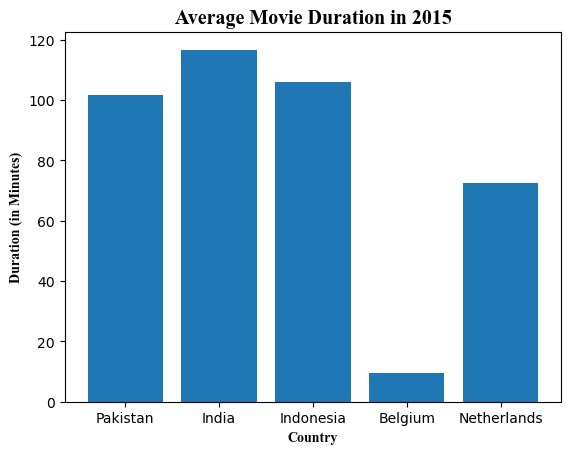

In [4]:
# Set X and Y For The Graph
x = ['Pakistan', 'India', 'Indonesia', 'Belgium', 'Netherlands']
y = grouped['duration'].loc[x]

# Graph Modifications
plt.bar(x, y)  
plt.style.use('ggplot')
plt.ylabel('Duration (in Minutes)', fontname = "Times New Roman", fontweight = "bold")
plt.xlabel('Country', fontname = "Times New Roman", fontweight = "bold")
plt.title('Average Movie Duration in 2015', fontname = "Times New Roman", fontweight = "bold")

###  __[5]__ Mean Duration By Country and Year 
In the following code I filter out countries that are not India or the Netherlands. I also filter out data of duration for both countries that does not fall between 2015 and 2020. I then use this data to calculate the mean movie length for each year between 2015 and 2020 for India and the Netherlands. I print out the data for Netherlands movie durations over time as an example for readers.

In [5]:
# New variable for the mean movie duration over the years in India
pd = (df['type'] == 'Movie') & (df['country'] == 'India') & (df['release_year'].between(2015,2020))
indiaData = df[pd]
indiaMeans = indiaData.groupby('release_year').mean(numeric_only=True).sort_index()

# New variable for the mean movie duration over the years in the Netherlands
nd = (df['type'] == 'Movie') & (df['country'] == 'Netherlands') & (df['release_year'].between(2015,2020))
netherlandsData = df[nd]
netherlandsMeans = netherlandsData.groupby('release_year').mean(numeric_only=True).sort_index()

netherlandsMeans

,duration
release_year,
2015,70.333333
2016,132.000000
2017,81.000000
2018,95.000000
2019,82.000000
2020,64.500000


### __[6]__ Second Graph (Line)
In the following code, I create line graphs that show the change in average duration of movies from 2015 to 2020 in both India and the Netherlands. I use the data extracted from the data set in the cell above to create this graph.

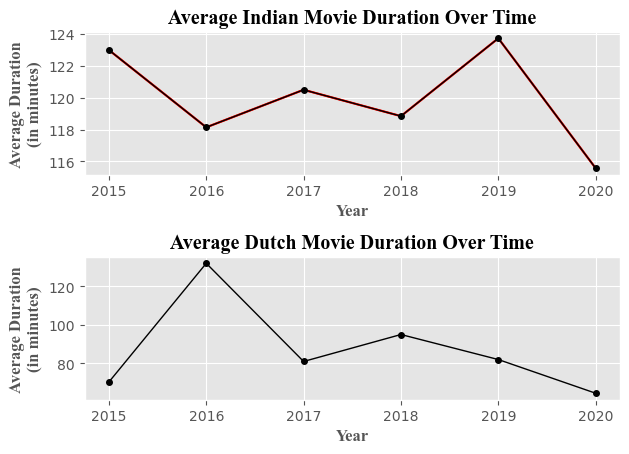

In [6]:
# Setting X and Y for Indian movie subplot
xI = indiaMeans.index
yI = indiaMeans

# Setting up subplot
fig, (ax, ax2) = plt.subplots(2,1)
ax.plot(xI,yI)

# Indian movie plot modifications
fig.suptitle(None)
ax.plot(xI, yI, color = "red")
csfont = {'fontname':'Times New Roman'}
ax.set_ylabel("Average Duration\n(in minutes)", fontweight="bold", **csfont)
ax.set_xlabel("Year", fontweight="bold", **csfont)
ax.set_title("Average Indian Movie Duration Over Time", fontweight="bold", **csfont)

# Dutch Movie Plot Modifications
ax2.set_ylabel("Average Duration\n(in minutes)", fontweight="bold", **csfont)
ax2.set_xlabel("Year", fontweight="bold", **csfont)
ax2.set_title("Average Dutch Movie Duration Over Time", fontweight="bold", **csfont)

xN = netherlandsMeans
yN = netherlandsMeans

ax.plot(xI, yI, color = "black", marker = 'o', markersize = 4, linewidth = 1)
ax2.plot(xI, yN, color = "black", marker = 'o', markersize = 4, linewidth = 1)


plt.style.use('ggplot')
fig.tight_layout()

### [7] Mean and Correlation
In this code, I convert the duration data for India and the Netherlands from a dataset to an array. I then use that array to calculate correlation coefficients and means.

In [7]:
# Calculating Correlation Coefficient for duration of Indian and Dutch Movies over time
yI_values = yI['duration'].values
correlation_coefficient1,p_value1 = pearsonr(xI, yI_values)

yN_values = yN['duration'].values
correlation_coefficient2, p_value1 = pearsonr(xI, yN_values)

print("Mean Movie Duration Between 2015-2020 in India:",  mean(yI_values))
print("Mean Movie Duration Between 2015-2020 in the Netherlands:",  mean(yN_values))
print(" ") 
print("Correlation Coefficient For Average Indian Movie Length:", correlation_coefficient1)
print("Correlation Coefficient For Average Dutch Movie Length:", correlation_coefficient2)

Mean Movie Duration Between 2015-2020 in India: 119.95696840970405
Mean Movie Duration Between 2015-2020 in the Netherlands: 87.47222222222223
 
Correlation Coefficient For Average Indian Movie Length: -0.3813123985092277
Correlation Coefficient For Average Dutch Movie Length: -0.3645359117264644


### [8] Conclusion
From both the bar graph and line graphs, it is evident that India produces movies which are longer than movies in most other places, and much longer than movies in the Netherlands. Looking at an individual year like 2015 (which was done through the bar graph) exemplifies this difference. Looking at broader data from 2015 to 2020 reveals the statement to be true as the average movie duration in India is about 120 minutes and the average move duration is about 87 minutes in the Netherlands. This results in a 33 minute difference between the average movie in Netherlands to the average movie in India. An interesting similarity is the negative correlation of movie duration over time in both the Netherlands and India. Indian movie lengths have a -0.38 correlation coefficeint over time and Dutch movie lengths have a -0.36 correlation coefficient over time. Although they are both weak negative correlations, they both exemplify a decrease in movie duration over time. I believe that this may have to with the increased popularity of short-form content through apps like Youtube and TikTok which have lowered the attention span of people. An interesting way to continue this analysis of the apparent decrease in movie duration over time would be to connect it to an analysis of attention span over time. 